- OpenClassrooms Project 6, Data Scientist
- Author : Oumeima EL GHARBI
- Date : October, November 2022

### Importing libraries

In [1]:
import pandas as pd
%reset -f

import warnings
warnings.filterwarnings(action="ignore")

from preprocess_NLP import *
from common_graphs import *

from os import listdir
from os.path import isfile, join
import os

# NLP
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# import spacy

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud ### WARNINGS !!
from PIL import Image

from pandarallel import pandarallel

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


In [2]:
# Starting time
t0 = time()

input_path = "./dataset/cleaned/"
input_filename = "data_text.csv"
input_file = "{}{}".format(input_path, input_filename)

output_path = "./dataset/cleaned/"

## Part I : Exploratory Data Analysis

##### General overview

In [3]:
data_text = pd.read_csv(input_file)

In [4]:
data_text.head(5)

,product_name,text,category,target
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4


In [5]:
data_text.tail(5)

,product_name,text,category,target
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0
1046,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0
1048,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0
1049,Uberlyfe Large Vinyl Sticker,Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...,Baby Care,0


In [6]:
data_text.sample(20)

,product_name,text,category,target
1041,Wallmantra Extra Large Vinyl Stickers Sticker,Buy Wallmantra Extra Large Vinyl Stickers Stic...,Baby Care,0
823,Firstrace 101-107 Analog Watch - For Couple,Firstrace 101-107 Analog Watch - For Couple -...,Watches,6
281,Bhavya Velvet Sofa Cover,Bhavya Velvet Sofa Cover (Grey Pack of 10) Pri...,Home Furnishing,4
66,CHHOTE JANAB COZY MATTRESS PROTECTOR(SET OF 2),Specifications of CHHOTE JANAB COZY MATTRESS P...,Baby Care,0
563,Fluid FS201-BL01 Analog-Digital Watch - For W...,Fluid FS201-BL01 Analog-Digital Watch - For W...,Watches,6
475,Allin Exporters Cumin Seed Oil (Co2 Extract),Key Features of Allin Exporters Cumin Seed Oil...,Beauty and Personal Care,1
338,Adidas Get Ready and Natural Vitality Combo Set,Flipkart.com: Buy Adidas Get Ready and Natural...,Beauty and Personal Care,1
730,Foolzy Pack of 24 Lipsticks 84 g,Flipkart.com: Buy Foolzy Pack of 24 Lipsticks ...,Beauty and Personal Care,1
483,4D Lenovo IdeaPad Y430g 6 Cell Laptop Battery,Buy 4D Lenovo IdeaPad Y430g 6 Cell Laptop Batt...,Computers,2
826,Timex TI000I70600 Analog Watch - For Men,Timex TI000I70600 Analog Watch - For Men - Bu...,Watches,6


##### Global Statistics

In [7]:
data_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  1050 non-null   object
 1   text          1050 non-null   object
 2   category      1050 non-null   object
 3   target        1050 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 32.9+ KB


In [8]:
data_text.isna().sum()

product_name    0
text            0
category        0
target          0
dtype: int64

In [9]:
data_text.isna().mean()

product_name    0.0
text            0.0
category        0.0
target          0.0
dtype: float64

In [10]:
data_text.dtypes.value_counts()

object    3
int64     1
dtype: int64

In [11]:
data_text.nunique()

product_name    1050
text            1050
category           7
target             7
dtype: int64

In [12]:
data_text.shape

(1050, 4)

In [13]:
idx = data_text.duplicated(subset="text", keep="first")
data_text.loc[idx, :].sort_values("text")

,product_name,text,category,target


In [14]:
data_text.describe(include="object")

,product_name,text,category
count,1050,1050,1050
unique,1050,1050,7
top,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing
freq,1,1,150


In [15]:
data_text.target.value_counts(normalize=True)

4    0.142857
0    0.142857
6    0.142857
3    0.142857
5    0.142857
1    0.142857
2    0.142857
Name: target, dtype: float64

<AxesSubplot:ylabel='target'>

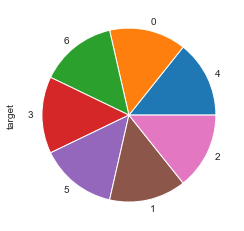

In [16]:
data_text.target.value_counts().plot(kind="pie")

##### Length

In [17]:
data_text.text.apply(lambda i: len(i))

0       1420
1        444
2       1258
3        858
4       1197
        ... 
1045    2432
1046    1660
1047     262
1048     210
1049     187
Name: text, Length: 1050, dtype: int64

<AxesSubplot:xlabel='text'>

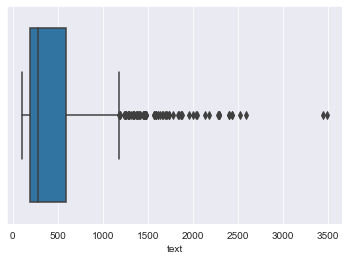

In [18]:
tmp = data_text.text.str.len()
data_text["_len_txt_"] = tmp

sns.boxplot(tmp)

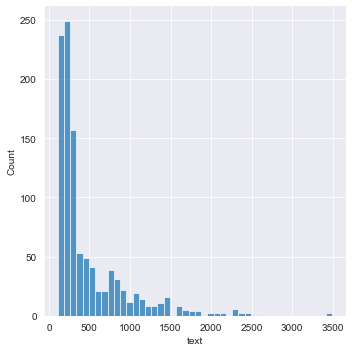

In [19]:
sns.displot(tmp)

<AxesSubplot:xlabel='product_name'>

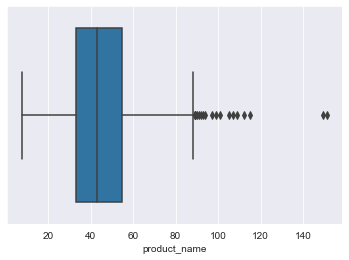

In [20]:
tmp = data_text.product_name.str.len()
data_text["_len_product_name_"] = tmp

sns.boxplot(tmp)

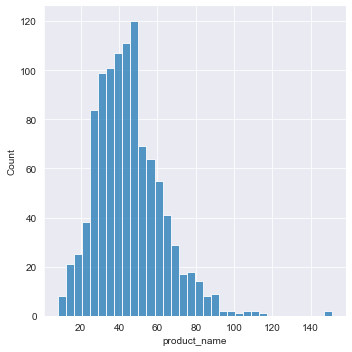

In [21]:
sns.displot(tmp)

In [22]:
data_text

,product_name,text,category,target,_len_txt_,_len_product_name_
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4,1420,58
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0,444,26
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0,1258,35
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4,858,63
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4,1197,53
...,...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0,2432,46
1046,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0,1660,38
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0,262,65
1048,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0,210,39


##### Multivariate analysis

In [23]:
corr = data_text.corr()
corr

,target,_len_txt_,_len_product_name_
target,1.000000,-0.020285,-0.011436
_len_txt_,-0.020285,1.000000,0.174393
_len_product_name_,-0.011436,0.174393,1.000000


<AxesSubplot:>

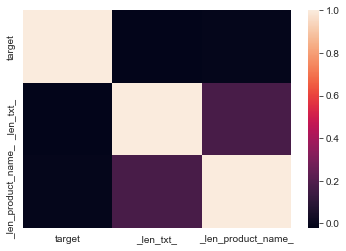

In [24]:
sns.heatmap(corr)

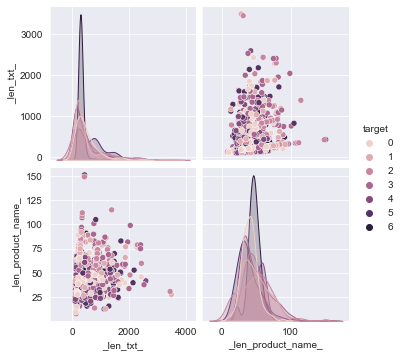

In [25]:
sns.pairplot(data_text, hue="target")

In [26]:
data_text.sort_values("_len_txt_").head(10)

,product_name,text,category,target,_len_txt_,_len_product_name_
877,Nkp Cotton Bath Towel,Buy Nkp Cotton Bath Towel at Rs. 549 at Flipka...,Home Furnishing,4,109,21
890,IWS Cotton Bath Towel,Buy IWS Cotton Bath Towel at Rs. 299 at Flipka...,Home Furnishing,4,109,21
1030,OMRD RD6697 Hot and cold Pack,Specifications of OMRD RD6697 Hot and cold Pac...,Beauty and Personal Care,1,111,29
651,Marvel Cotton Bath Towel,Buy Marvel Cotton Bath Towel at Rs. 449 at Fli...,Baby Care,0,112,24
892,MB Cotton Set of Towels,Buy MB Cotton Set of Towels at Rs. 1195 at Fli...,Home Furnishing,4,112,23
599,Next Steps Baby Girl's Layered Dress,Next Steps Baby Girl's Layered Dress\r\n ...,Baby Care,0,112,36
1005,Milani Runway shadow Wet/Dry Black Out 3 g,Specifications of Milani Runway shadow Wet/Dry...,Beauty and Personal Care,1,113,42
678,Neyth Cotton Set of Towels,Buy Neyth Cotton Set of Towels at Rs. 170 at F...,Baby Care,0,114,26
874,Mafatlal Cotton Bath Towel,Buy Mafatlal Cotton Bath Towel at Rs. 545 at F...,Home Furnishing,4,114,26
884,Amber Cotton Set of Towels,Buy Amber Cotton Set of Towels at Rs. 239 at F...,Home Furnishing,4,114,26


In [27]:
data_text.sort_values("_len_txt_").tail(10)

,product_name,text,category,target,_len_txt_,_len_product_name_
433,"Smartpro 19.5v,3.9a Replacement Charger for Va...","Key Features of Smartpro 19.5v,3.9a Replacemen...",Computers,2,2297,79
435,"Smartpro 19.5v,3.9a Replacement Charger for Va...","Key Features of Smartpro 19.5v,3.9a Replacemen...",Computers,2,2298,79
696,Tallenge Christmas Collection - Nativity Art -...,Tallenge Christmas Collection - Nativity Art -...,Home Decor & Festive Needs,3,2405,75
694,Tallenge Christmas Collection - Echoes Of Wint...,Tallenge Christmas Collection - Echoes Of Wint...,Home Decor & Festive Needs,3,2409,79
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0,2432,46
589,"Shopfloor.XYZ Vacuum Cleaner for Computers, La...","Shopfloor.XYZ Vacuum Cleaner for Computers, La...",Computers,2,2436,60
916,wallskart Floral & Botanical Wallpaper,Key Features of wallskart Floral & Botanical W...,Home Decor & Festive Needs,3,2529,38
715,Pioneer Pragati Floral Single Duvet Orange,Pioneer Pragati Floral Single Duvet Orange (1 ...,Home Furnishing,4,2594,42
639,Sunlast 16 inch Laptop Backpack,Key Features of Sunlast 16 inch Laptop Backpac...,Computers,2,3447,31
437,HomeEdge Solid Wood King Bed,Key Features of HomeEdge Solid Wood King Bed K...,Beauty and Personal Care,1,3490,28


In [28]:
data_text = data_text.drop(columns=["_len_txt_", "_len_product_name_"])
data_text

,product_name,text,category,target
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0
1046,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0
1048,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0


#### Explore corpus and documents

##### 1) print N random documents

In [29]:
df_sample = data_text.sample(20)
df_sample

,product_name,text,category,target
508,Lapguard HP Pavilion dv5-1015nr 6 Cell Laptop ...,Buy Lapguard HP Pavilion dv5-1015nr 6 Cell Lap...,Computers,2
770,Offspring Solid Single Blanket Pink,Buy Offspring Solid Single Blanket Pink at Rs....,Baby Care,0
392,"Wild Stone Drift,Wave Combo Set","Flipkart.com: Buy Wild Stone Drift,Wave Combo ...",Beauty and Personal Care,1
747,Mxofere Combo Papaya Aloevera Jasmine Rose Alm...,Buy Mxofere Combo Papaya Aloevera Jasmine Rose...,Beauty and Personal Care,1
442,Rute Baby Girl's Sleepsuit,Key Features of Rute Baby Girl's Sleepsuit Fab...,Baby Care,0
451,Lushomes Plain Back Cushion,Key Features of Lushomes Plain Back Cushion Av...,Home Furnishing,4
779,Mxofere Combo Rose Jasmine Almond Honey Aloeve...,Buy Mxofere Combo Rose Jasmine Almond Honey Al...,Beauty and Personal Care,1
529,Times 317TMS317 Party-Wedding Analog Watch - ...,Times 317TMS317 Party-Wedding Analog Watch - ...,Watches,6
182,Printland PMR1902 Ceramic Mug,Printland PMR1902 Ceramic Mug (350 ml)\r\n ...,Kitchen & Dining,5
381,"Envy 1000 Intense,Magnetic Combo Set","Flipkart.com: Buy Envy 1000 Intense,Magnetic C...",Beauty and Personal Care,1


In [30]:
for index, series in df_sample.iterrows():
    text_1 = f"target: {series['target']}\n"
    print(text_1 + series["text"] + "..." + "\n\n")

target: 2
Buy Lapguard HP Pavilion dv5-1015nr 6 Cell Laptop Battery only for Rs. 0.0 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!...


target: 0
Buy Offspring Solid Single Blanket Pink at Rs. 305 at Flipkart.com. Only Genuine Products. Free Shipping. Cash On Delivery!...


target: 1
Flipkart.com: Buy Wild Stone Drift,Wave Combo Set online only for Rs. 355 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!...


target: 1
Buy Mxofere Combo Papaya Aloevera Jasmine Rose Almond Honey Soap Kit for Rs.295 online. Mxofere Combo Papaya Aloevera Jasmine Rose Almond Honey Soap Kit at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee....


target: 0
Key Features of Rute Baby Girl's Sleepsuit Fabric: Cotton Brand Color: Pink,Rute Baby Girl's Sleepsuit Price: Rs. 399 Rute Pink embroidered cotton sleepsuit,Specifications of Rute Baby Gi

##### 2) print documents vs target

In [31]:
def print_sample(sub_df, n_sample=10):
    """
    Prints out n_sample documents from a corpus
    :param sub_df:
    :param n_sample:
    :return:
    """
    sample = sub_df.sample(n_sample)

    for index, series in sample.iterrows():
        text_1 = f"target: {series['target']}\n"
        print(text_1 + series["text"] + "..." + "\n\n")

In [32]:
df_1 = data_text[data_text.target == 1]
df_1.head()

,product_name,text,category,target
43,Burt s Bees Hair Repair Shea And Grapefruit De...,Key Features of Burt s Bees Hair Repair Shea A...,Beauty and Personal Care,1
49,Suave Naturals Everlasting Sunshine Conditioner,Key Features of Suave Naturals Everlasting Sun...,Beauty and Personal Care,1
56,Borse N16 Make Up And Jewellery Vanity Case,Buy Borse N16 Make Up And Jewellery Vanity Cas...,Beauty and Personal Care,1
57,RYTHMX FB NAIL POLISHES BLACK LIPSTICKS IMPORT...,Specifications of RYTHMX FB NAIL POLISHES BLAC...,Beauty and Personal Care,1
58,RYTHMX FB NAIL POLISHES BLACK LIPSTICKS IMPORT...,Key Features of RYTHMX FB NAIL POLISHES BLACK ...,Beauty and Personal Care,1


In [33]:
print_sample(df_1)

target: 1
Buy Mxofere Combo Rose Soap And Aloevera Lemon Facewash Kit for Rs.285 online. Mxofere Combo Rose Soap And Aloevera Lemon Facewash Kit at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee....


target: 1
SSCP Pine Oil (30 ml)
                         Price: Rs. 319
				
			Pine oil is most useful to relieve mental, physical and sexual fatigue, while having a cleansing and invigorating effect on an area and is great for vapor therapy in a sick room as it promotes healing. It can be used for cuts and sores, scabies and lice and for excessive perspiration, while its warming properties help with rheumatism, arthritis, gout, muscular aches and pains and it can stimulate circulation. Furthermore it can help in cases of bronchitis, asthma, catarrh, coughs, laryngitis, colds and flu. It eases breathlessness and sinusitis.
Pine oil is most useful to relieve mental, physical and sexual fatigue, while having a cleansing and invigorati

In [34]:
df_6 = data_text[data_text.target == 6]
print_sample(df_6)

target: 6
CB Fashion 108-121 Analog Watch  - For Women - Buy CB Fashion 108-121 Analog Watch  - For Women  108-121 Online at Rs.619 in India Only at Flipkart.com. - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!...


target: 6
Perucci PC-218 Decker Analog Watch  - For Men - Buy Perucci PC-218 Decker Analog Watch  - For Men  PC-218 Online at Rs.1290 in India Only at Flipkart.com. Beautifull Watches, Comfortable Watches, Fancy Watche, Stylish Watches - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!...


target: 6
Times 284TMS284 Party-Wedding Analog Watch  - For Women - Buy Times 284TMS284 Party-Wedding Analog Watch  - For Women  284TMS284 Online at Rs.550 in India Only at Flipkart.com. - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!...


target: 6
Lois Caron LCS-4032 Analog Watch  - For Boys, Men - Buy Lois Caron LCS-403

## Part II : Text processing

##### Downloads and options

In [35]:
# download

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [36]:
# pandarallel
pandarallel.initialize(progress_bar=True, nb_workers=6
                       #, verbose=1
)

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [37]:
# init sns
sns.set()

##### Loading data

In [38]:
data_text.head()

,product_name,text,category,target
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4


In [39]:
data_text.shape

(1050, 4)

### I) Cleaning the corpus

#### Work on a specific document

In [40]:
# select a random document

doc = data_text.text.sample(1) # get a row
doc = doc.values[0] # get a numpy array
doc

"Sonpra Baby Boy's Bodysuit\r\n                         Price: Rs. 570\r\n\t\t\t\t\r\n\t\t\t100% Cotton Baby Rompers Bodysuits , Combination of Solids & Stripes , Five Bodysuits (Pack of 5)- Best Gift For Your baby\r\n, Kids Safety & made with Premium Quality Soft Fabric\r\n, Save your little cutie pie . You surely avoid to go out with your baby but if you go out then do not worry about your kid's safety , from the house of Sonpra this set is now available online on this website to protect your kid.\r\n100% Cotton Baby Rompers Bodysuits , Combination of Solids & Stripes , Five Bodysuits (Pack of 5)- Best Gift For Your baby\r\n, Kids Safety & made with Premium Quality Soft Fabric\r\n, Save your little cutie pie . You surely avoid to go out with your baby but if you go out then do not worry about your kid's safety , from the house of Sonpra this set is now available online on this website to protect your kid."

##### 1) Lower

In [41]:
doc = doc.lower()
doc

"sonpra baby boy's bodysuit\r\n                         price: rs. 570\r\n\t\t\t\t\r\n\t\t\t100% cotton baby rompers bodysuits , combination of solids & stripes , five bodysuits (pack of 5)- best gift for your baby\r\n, kids safety & made with premium quality soft fabric\r\n, save your little cutie pie . you surely avoid to go out with your baby but if you go out then do not worry about your kid's safety , from the house of sonpra this set is now available online on this website to protect your kid.\r\n100% cotton baby rompers bodysuits , combination of solids & stripes , five bodysuits (pack of 5)- best gift for your baby\r\n, kids safety & made with premium quality soft fabric\r\n, save your little cutie pie . you surely avoid to go out with your baby but if you go out then do not worry about your kid's safety , from the house of sonpra this set is now available online on this website to protect your kid."

##### 2) Tokenization

In [42]:
tokens = word_tokenize(doc)
tokens

['sonpra',
 'baby',
 'boy',
 "'s",
 'bodysuit',
 'price',
 ':',
 'rs',
 '.',
 '570',
 '100',
 '%',
 'cotton',
 'baby',
 'rompers',
 'bodysuits',
 ',',
 'combination',
 'of',
 'solids',
 '&',
 'stripes',
 ',',
 'five',
 'bodysuits',
 '(',
 'pack',
 'of',
 '5',
 ')',
 '-',
 'best',
 'gift',
 'for',
 'your',
 'baby',
 ',',
 'kids',
 'safety',
 '&',
 'made',
 'with',
 'premium',
 'quality',
 'soft',
 'fabric',
 ',',
 'save',
 'your',
 'little',
 'cutie',
 'pie',
 '.',
 'you',
 'surely',
 'avoid',
 'to',
 'go',
 'out',
 'with',
 'your',
 'baby',
 'but',
 'if',
 'you',
 'go',
 'out',
 'then',
 'do',
 'not',
 'worry',
 'about',
 'your',
 'kid',
 "'s",
 'safety',
 ',',
 'from',
 'the',
 'house',
 'of',
 'sonpra',
 'this',
 'set',
 'is',
 'now',
 'available',
 'online',
 'on',
 'this',
 'website',
 'to',
 'protect',
 'your',
 'kid',
 '.',
 '100',
 '%',
 'cotton',
 'baby',
 'rompers',
 'bodysuits',
 ',',
 'combination',
 'of',
 'solids',
 '&',
 'stripes',
 ',',
 'five',
 'bodysuits',
 '(',
 'pac

In [43]:
len(tokens)

182

In [44]:
len(set(tokens))

69

In [45]:
display_tokens_info(tokens)

nb tokens 182, nb tokens uniques 69
['sonpra', 'baby', 'boy', "'s", 'bodysuit', 'price', ':', 'rs', '.', '570', '100', '%', 'cotton', 'baby', 'rompers', 'bodysuits', ',', 'combination', 'of', 'solids', '&', 'stripes', ',', 'five', 'bodysuits', '(', 'pack', 'of', '5', ')']
['solids', '.', '570', 'bodysuits', 'boy', '(', "'s", 'cotton', 'rs', 'of', '5', 'bodysuit', '%', 'pack', ':', 'price', 'five', ',', 'baby', '&', 'rompers', '100', 'sonpra', 'stripes', 'combination', ')']


In [46]:
# an other tokenize

tokens = wordpunct_tokenize(doc)
display_tokens_info(tokens)

nb tokens 183, nb tokens uniques 69
['sonpra', 'baby', 'boy', "'", 's', 'bodysuit', 'price', ':', 'rs', '.', '570', '100', '%', 'cotton', 'baby', 'rompers', 'bodysuits', ',', 'combination', 'of', 'solids', '&', 'stripes', ',', 'five', 'bodysuits', '(', 'pack', 'of', '5']
['solids', '.', 's', '570', 'bodysuits', 'boy', '(', 'cotton', 'rs', 'of', '5', 'bodysuit', '%', 'pack', ':', 'price', 'five', "'", ',', 'baby', '&', 'rompers', '100', 'sonpra', 'stripes', 'combination']


##### 3) Stopwords

In [47]:
# stop_words

#global stop_words
#stop_words = set(stopwords.words('english'))
print(stop_words)

{'from', 'all', 'don', 'only', "isn't", 's', 'doing', 'nor', 'wouldn', 'both', 'does', 'so', 'same', 'too', "wouldn't", 'or', "wasn't", 'other', 'needn', "weren't", 'down', 'll', 'you', 'very', 'up', 'can', 'by', 'on', 'just', 'your', "you'll", 'off', 'myself', 'been', 'below', 'the', 'there', 'yourself', 'being', 'doesn', 'until', 'they', 'while', 'did', "mightn't", 'theirs', 'ourselves', 'yourselves', 'these', 'then', 'most', 'through', 'to', 'about', 'aren', "shan't", 'as', "you're", 'will', 'them', 'of', 'above', 'for', 'has', 'mustn', 'with', 'their', 'didn', 'but', 'shouldn', 'themselves', 'than', 'itself', 'what', 'how', 'own', 'yours', 'my', 'her', 'those', 'again', "that'll", 'am', 'when', 'where', 'hadn', 'here', 'we', "mustn't", 'because', 'during', 'ain', 'such', 'no', "aren't", 'whom', 'was', 'have', 'i', 'himself', 'y', "haven't", 'ma', 'over', "should've", 't', 'shan', 'once', "it's", 'she', 'isn', 'out', 'against', 'in', "you've", 'he', 'now', "doesn't", 'do', 'hasn', '

In [48]:
tokens = [w for w in tokens if w not in stop_words]

In [49]:
display_tokens_info(tokens)

nb tokens 120, nb tokens uniques 49
['sonpra', 'baby', 'boy', "'", 'bodysuit', 'price', ':', 'rs', '.', '570', '100', '%', 'cotton', 'baby', 'rompers', 'bodysuits', ',', 'combination', 'solids', '&', 'stripes', ',', 'five', 'bodysuits', '(', 'pack', '5', ')-', 'best', 'gift']
['solids', '.', '570', 'bodysuits', 'boy', '(', 'cotton', 'best', 'rs', ')-', '5', 'bodysuit', '%', 'pack', ':', 'price', 'five', 'gift', "'", ',', 'baby', '&', 'rompers', '100', 'sonpra', 'stripes', 'combination']


In [50]:
# an other tokenizer

tokenizer = RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(doc)
display_tokens_info(tokens)

nb tokens 154, nb tokens uniques 61
['sonpra', 'baby', 'boy', 's', 'bodysuit', 'price', 'rs', '570', '100', 'cotton', 'baby', 'rompers', 'bodysuits', 'combination', 'of', 'solids', 'stripes', 'five', 'bodysuits', 'pack', 'of', '5', 'best', 'gift', 'for', 'your', 'baby', 'kids', 'safety', 'made']
['solids', 'safety', 's', '570', 'bodysuits', 'boy', 'cotton', 'best', 'rs', 'made', 'kids', 'of', 'for', '5', 'bodysuit', 'pack', 'price', 'your', 'five', 'gift', 'baby', 'rompers', '100', 'sonpra', 'stripes', 'combination']


In [51]:
# remove stopwords

tokens = [w for w in tokens if w not in stop_words]
display_tokens_info(tokens)

nb tokens 91, nb tokens uniques 41
['sonpra', 'baby', 'boy', 'bodysuit', 'price', 'rs', '570', '100', 'cotton', 'baby', 'rompers', 'bodysuits', 'combination', 'solids', 'stripes', 'five', 'bodysuits', 'pack', '5', 'best', 'gift', 'baby', 'kids', 'safety', 'made', 'premium', 'quality', 'soft', 'fabric', 'save']
['solids', 'safety', '570', 'bodysuits', 'boy', 'fabric', 'cotton', 'best', 'rs', 'save', 'made', 'kids', '5', 'bodysuit', 'pack', 'quality', 'price', 'five', 'gift', 'premium', 'baby', 'rompers', '100', 'soft', 'sonpra', 'stripes', 'combination']


##### 4) First cleaning function

In [52]:
tokens = process_text_1(doc)
display_tokens_info(tokens)

nb tokens 91, nb tokens uniques 41
['sonpra', 'baby', 'boy', 'bodysuit', 'price', 'rs', '570', '100', 'cotton', 'baby', 'rompers', 'bodysuits', 'combination', 'solids', 'stripes', 'five', 'bodysuits', 'pack', '5', 'best', 'gift', 'baby', 'kids', 'safety', 'made', 'premium', 'quality', 'soft', 'fabric', 'save']
['solids', 'safety', '570', 'bodysuits', 'boy', 'fabric', 'cotton', 'best', 'rs', 'save', 'made', 'kids', '5', 'bodysuit', 'pack', 'quality', 'price', 'five', 'gift', 'premium', 'baby', 'rompers', '100', 'soft', 'sonpra', 'stripes', 'combination']


#### Working on the entire corpus

##### 1) Build raw corpus

In [53]:
# join all corpus

raw_corpus = "".join(data_text.text.values)
raw_corpus[:1_000]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [54]:
len(raw_corpus)

497512

In [55]:
# process the corpus

corpus = process_text_1(raw_corpus)
display_tokens_info(corpus)

nb tokens 61452, nb tokens uniques 6165
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'height', 'pack', '2', 'price', 'rs', '899', 'curtain', 'enhances', 'look', 'interiors']
['213', 'floral', 'rs', 'elegance', 'enhances', 'key', 'interiors', 'polyester', 'door', 'pack', 'look', 'price', '899', 'curtain', 'eyelet', 'abstract', 'multicolor', 'height', '2', 'cm', 'features']


In [56]:
# value counts

tmp = pd.Series(corpus).value_counts()
tmp

rs           911
products     631
free         618
delivery     567
cash         564
            ... 
drawerkey      1
680            1
roundbuy       1
homeehub       1
dell           1
Length: 6165, dtype: int64

In [57]:
# visualization

#sns.barplot(x=tmp.index, y=tmp.values)

In [58]:
# 30th most common tokens

tmp.head(30)

rs                911
products          631
free              618
delivery          567
cash              564
genuine           564
shipping          564
replacement       559
buy               543
day               540
cm                532
1                 524
30                498
flipkart          475
guarantee         471
com               468
online            396
features          395
price             352
watch             329
color             328
baby              320
mug               318
pack              317
material          312
set               306
type              304
cotton            299
specifications    295
box               291
dtype: int64

In [59]:
# 30th last common tokens

tmp.tail(30)

md199hn                 1
seaterspecifications    1
explode                 1
shot                    1
huawei                  1
sport                   1
ski                     1
1399                    1
ac2400                  1
bornbabykids            1
552                     1
4509                    1
ws331c                  1
architecture            1
5199                    1
socket                  1
1150key                 1
6428nc                  1
585                     1
clothing                1
needybee                1
752dru                  1
susceptible             1
linespecifications      1
esteem                  1
drawerkey               1
680                     1
roundbuy                1
homeehub                1
dell                    1
dtype: int64

In [60]:
tmp.describe()

count    6165.000000
mean        9.967883
std        38.897271
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       911.000000
dtype: float64

In [61]:
# sns.displot(tmp)

<AxesSubplot:>

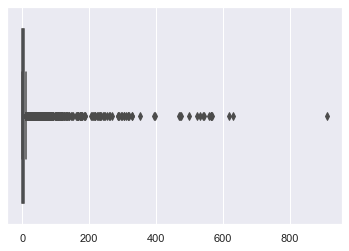

In [62]:
sns.boxplot(tmp) # 'bad distribution'

##### 2) List rare tokens

In [63]:
# unique words --> not useful

tmp = pd.Series(corpus).value_counts()
list_unique_words = tmp[tmp == 1]
list_unique_words[:30]

paraben         1
vinegar         1
glycol          1
oodles          1
ingredients     1
skip            1
bullshit        1
word            1
soapking        1
hop             1
arabicoudh      1
grass           1
students        1
979             1
leafs           1
vegetarian      1
length225       1
6645            1
quantities      1
sscp            1
582             1
appreciation    1
flawers         1
tulip           1
playing         1
balls           1
ballsech        1
repeatedly      1
pmr1918         1
pmba1872        1
dtype: int64

In [64]:
len(list_unique_words)

2114

In [65]:
list_unique_words = list(list_unique_words.index)
list_unique_words[:30]

['paraben',
 'vinegar',
 'glycol',
 'oodles',
 'ingredients',
 'skip',
 'bullshit',
 'word',
 'soapking',
 'hop',
 'arabicoudh',
 'grass',
 'students',
 '979',
 'leafs',
 'vegetarian',
 'length225',
 '6645',
 'quantities',
 'sscp',
 '582',
 'appreciation',
 'flawers',
 'tulip',
 'playing',
 'balls',
 'ballsech',
 'repeatedly',
 'pmr1918',
 'pmba1872']

In [66]:
# save it for later

tmp = pd.DataFrame({"words": list_unique_words})
tmp.to_csv(output_path + "unique_words.csv", index=False)

In [67]:
# idem for 2 times

tmp = pd.Series(corpus).value_counts()
list_max_2_words = tmp[tmp <= 2]
list_max_2_words[:30]

pokizo                2
knows                 2
deluxe                2
prestige              2
birds                 2
thus                  2
styles                2
880                   2
dean                  2
stage                 2
plus                  2
neckspecifications    2
welcomed              2
milton                2
camerii               2
zipper                2
hourglass             2
pressure              2
bib                   2
850                   2
dat                   2
neckerchew            2
chompers              2
v220w                 2
fashionin             2
velcro                2
cheeky                2
bsf                   2
hilton                2
superb                2
dtype: int64

In [68]:
len(list_max_2_words)

3446

In [69]:
# save it

list_max_2_words = list(list_max_2_words.index)
tmp = pd.DataFrame({"words": list_max_2_words})
tmp.to_csv(output_path + "max_2_words.csv", index=False)

In [70]:
# idem for 5 times

tmp = pd.Series(corpus).value_counts()
list_max_5_words = tmp[tmp <= 5]
list_max_5_words[:30]

opener       5
dummy        5
marvel       5
ordinary     5
following    5
watche       5
belt         5
layers       5
trendnet     5
burner       5
fb           5
beach        5
moist        5
995          5
attention    5
vatika       5
strip        5
intel        5
across       5
colored      5
styling      5
appealing    5
polishes     5
serving      5
winter       5
lace         5
loves        5
320          5
fluffy       5
straps       5
dtype: int64

In [71]:
len(list_max_5_words)

4677

In [72]:
# save it

list_max_5_words = list(list_max_5_words.index)
tmp = pd.DataFrame({"words": list_max_5_words})
tmp.to_csv(output_path + "max_5_words.csv", index=False)

##### 3) 2nd cleaning function

In [73]:
display_tokens_info(corpus)

nb tokens 61452, nb tokens uniques 6165
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'height', 'pack', '2', 'price', 'rs', '899', 'curtain', 'enhances', 'look', 'interiors']
['213', 'floral', 'rs', 'elegance', 'enhances', 'key', 'interiors', 'polyester', 'door', 'pack', 'look', 'price', '899', 'curtain', 'eyelet', 'abstract', 'multicolor', 'height', '2', 'cm', 'features']


In [74]:
len(set(corpus))

6165

In [75]:
corpus = process_text_2(raw_corpus,
                        list_rare_words=list_unique_words,
                        rejoin=False)
display_tokens_info(corpus)

nb tokens 51097, nb tokens uniques 3396
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhances', 'look', 'interiors', 'curtain', 'made', 'high', 'quality', 'polyester']
['floral', 'made', 'high', 'elegance', 'enhances', 'key', 'interiors', 'polyester', 'door', 'pack', 'quality', 'look', 'price', 'curtain', 'eyelet', 'abstract', 'multicolor', 'height', 'features']


In [76]:
len(set(corpus))

3396

##### 4) Stemming and Lemmatization

Lemmatization is the process of grouping together the different inflected forms of a word, so they can be analyzed as a single item. Lemmatization is similar to stemming, but it brings context to the words. So it links words with similar meanings to one word.

Stemming is the process if producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers.

In [77]:
# +/- 3s
corpus = process_text_3(raw_corpus, rejoin=False, list_rare_words=list_unique_words)
pd.Series(corpus).sample(30)

41544      golden
33712       paint
34468       price
37723        face
2900      qualiti
47750       ensur
16103      casual
8256         safe
37056     vitamin
3202      qualiti
2249        model
662        famili
9196          tea
108        eyelet
10290       smile
3887      control
9251     distinct
16633    deliveri
16407       sleev
26387    flipkart
38580        ring
2343          kid
26166       onlin
9089         love
47225       order
37086      diaper
19285     qualiti
35227        long
11323        wild
21379      bucket
dtype: object

In [78]:
display_tokens_info(corpus)

nb tokens 51097, nb tokens uniques 2773
['key', 'featur', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhanc', 'look', 'interior', 'curtain', 'made', 'high', 'qualiti', 'polyest']
['qualiti', 'floral', 'featur', 'interior', 'made', 'high', 'key', 'door', 'eleg', 'pack', 'look', 'price', 'curtain', 'eyelet', 'abstract', 'multicolor', 'height', 'enhanc', 'polyest']


In [79]:
corpus_lem = process_text_3(raw_corpus, rejoin=False, lem_or_stem="lem", list_rare_words=list_unique_words)
pd.Series(corpus_lem).sample(30)

38196            fruit
40215              fan
8949           feature
36939         delivery
46954          product
36523           single
42847         occasion
14054          product
35309             puff
30254            model
17198          genuine
17393            apple
6740            online
14773             come
14626            stick
50156             pack
32241          trainer
25592            round
40544            towel
20763    specification
39359          genuine
4080         shopmania
39490              usb
2023            spread
23148           cotton
33012             free
32350           online
43665         bendable
2349            pyjama
4230              sale
dtype: object

In [80]:
display_tokens_info(corpus_lem)

nb tokens 51097, nb tokens uniques 3123
['key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhances', 'look', 'interior', 'curtain', 'made', 'high', 'quality', 'polyester']
['floral', 'interior', 'feature', 'made', 'high', 'elegance', 'enhances', 'key', 'polyester', 'door', 'pack', 'quality', 'look', 'price', 'curtain', 'eyelet', 'abstract', 'multicolor', 'height']


##### 5) Only english words

In [81]:
pd.Series(words.words()).sample(30)

156652         proguardian
42033         conterminant
80677            guessable
50354     deliberalization
170879              roping
99303              jackboy
108248            loosener
214437         undermuslin
24797                Boran
124825             nocktat
210645            umpiress
109132             luteway
116550              minery
16876            axmanship
106374         Lichnophora
47020           curryfavel
129270         obstruction
171383             rubdown
26480      brochidodromous
87021        homolographic
92663              inbeing
42434     conversationally
84246        hemocytoblast
136995              Paguma
160063        puncturation
11572          apophylaxis
157581           prostylos
46893         curativeness
140804                pean
208997             tumbrel
dtype: object

In [82]:
len(set(words.words()))

235892

In [83]:
eng_words = [i.lower() for i in words.words()]
eng_words[:30]

['a',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'aani',
 'aardvark',
 'aardwolf',
 'aaron',
 'aaronic',
 'aaronical',
 'aaronite',
 'aaronitic',
 'aaru',
 'ab',
 'aba',
 'ababdeh',
 'ababua',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abactinally']

In [84]:
len(set(eng_words))

234377

In [85]:
ps = PorterStemmer()
eng_words_stem = [ps.stem(i) for i in eng_words]
display_tokens_info(eng_words_stem)

nb tokens 236736, nb tokens uniques 178311
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaron', 'aaron', 'aaronit', 'aaronit', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abac', 'abacay', 'abacin', 'abacin', 'abaciscu', 'abacist', 'aback', 'abactin', 'abactin']
['abacin', 'abacist', 'aaron', 'aba', 'aardwolf', 'aalii', 'aaronit', 'abacay', 'ababua', 'abactin', 'aaru', 'a', 'aani', 'abaciscu', 'aardvark', 'ab', 'aa', 'aback', 'aam', 'abac', 'aal', 'abaca', 'ababdeh']


In [86]:
len(set(eng_words_stem))

178311

In [87]:
lm = WordNetLemmatizer()
eng_words_lem = [lm.lemmatize(i) for i in eng_words]
display_tokens_info(eng_words_lem)

nb tokens 236736, nb tokens uniques 233450
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaronic', 'aaronical', 'aaronite', 'aaronitic', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abacate', 'abacay', 'abacinate', 'abacination', 'abaciscus', 'abacist', 'aback', 'abactinal', 'abactinally']
['abacist', 'abacination', 'aaron', 'aaronic', 'aba', 'aardwolf', 'aalii', 'abacate', 'abacinate', 'aaronical', 'abacay', 'ababua', 'abaciscus', 'aaru', 'aaronite', 'a', 'aani', 'abactinal', 'aardvark', 'abactinally', 'ab', 'aa', 'aback', 'aam', 'aaronitic', 'abac', 'aal', 'abaca', 'ababdeh']


In [88]:
len(set(eng_words_lem))

233450

In [89]:
corpus = process_text_4(raw_corpus, rejoin=False, lem_or_stem="stem", list_rare_words=list_unique_words, eng_words=eng_words_stem)

display_tokens_info(corpus)

nb tokens 45937, nb tokens uniques 2166
['key', 'featur', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhanc', 'look', 'interior', 'curtain', 'made', 'high', 'qualiti', 'polyest']
['qualiti', 'floral', 'featur', 'interior', 'made', 'high', 'key', 'door', 'eleg', 'pack', 'look', 'price', 'curtain', 'eyelet', 'abstract', 'multicolor', 'height', 'enhanc', 'polyest']


In [90]:
len(set(corpus))

2166

In [91]:
corpus_lem = process_text_4(raw_corpus, rejoin=False, lem_or_stem="lem", list_rare_words=list_unique_words, eng_words=eng_words_lem)
pd.Series(corpus_lem).sample(30)

2238        grapefruit
28738            price
2052           printed
810              watch
5424           package
16594           format
19478             pure
14315         suitable
5710              name
36799           portia
10678           drawer
28729        guarantee
21006        accessory
20525    specification
9537           perfect
18013          current
41436             room
11533           little
4932            surely
24694             view
39324            large
30962            store
1223               day
3430           content
7869               mug
19703       durability
23853          cleaner
29261             give
17550      replacement
5640            cotton
dtype: object

In [92]:
len(set(corpus_lem))

2333

In [93]:
corpus

['key',
 'featur',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'height',
 'pack',
 'price',
 'curtain',
 'enhanc',
 'look',
 'interior',
 'curtain',
 'made',
 'high',
 'qualiti',
 'polyest',
 'fabric',
 'featur',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environ',
 'curtain',
 'ant',
 'wrinkl',
 'anti',
 'shrinkag',
 'eleg',
 'give',
 'home',
 'bright',
 'appeal',
 'design',
 'attent',
 'sure',
 'contemporari',
 'eyelet',
 'curtain',
 'slide',
 'smoothli',
 'draw',
 'apart',
 'first',
 'thing',
 'morn',
 'welcom',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morn',
 'whole',
 'world',
 'draw',
 'even',
 'creat',
 'special',
 'moment',
 'beauti',
 'given',
 'sooth',
 'print',
 'bring',
 'home',
 'eleg',
 'curtain',
 'light',
 'room',
 'get',
 'right',
 'amount',
 'sunlight',
 'specif',
 'eleg',
 'polyest',
 

In [94]:
corpus_lem

['key',
 'feature',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'height',
 'pack',
 'price',
 'curtain',
 'look',
 'interior',
 'curtain',
 'made',
 'high',
 'quality',
 'polyester',
 'fabric',
 'feature',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environment',
 'curtain',
 'ant',
 'wrinkle',
 'anti',
 'shrinkage',
 'elegant',
 'give',
 'home',
 'bright',
 'appeal',
 'design',
 'attention',
 'sure',
 'contemporary',
 'eyelet',
 'curtain',
 'slide',
 'smoothly',
 'draw',
 'apart',
 'first',
 'thing',
 'morning',
 'welcome',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morning',
 'whole',
 'world',
 'draw',
 'evening',
 'create',
 'special',
 'moment',
 'beauty',
 'given',
 'soothing',
 'print',
 'bring',
 'home',
 'elegant',
 'curtain',
 'light',
 'room',
 'get',
 'right',
 'amount',
 'sunlight',

In [95]:
tmp = pd.Series(corpus_lem).value_counts()
tmp

product        863
free           618
delivery       567
cash           564
shipping       564
              ... 
captivating      2
nexus            2
teal             2
extended         2
film             2
Length: 2333, dtype: int64

In [96]:
##sns.barplot(x=tmp.index, y=tmp.values)

##### 6) Wordcloud

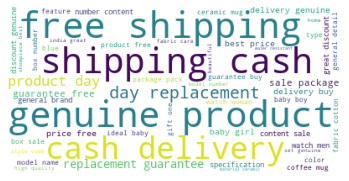

In [97]:
display_wordcloud([corpus_lem])

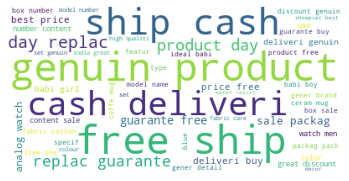

In [98]:
display_wordcloud([corpus])

#### Divide the corpus

##### 1) Separate the 7 categories

In [99]:
for i in range(7):
    globals()["df_" + str(i)] = data_text[data_text.target == i]

In [100]:
df_0.head()

,product_name,text,category,target
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
40,Mom and Kid Baby Girl's Printed Green Top & Py...,Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0
42,"Mom and Kid Baby Girl's Printed Blue, Grey Top...",Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0
63,KOHL Wine Bag Yellow,Key Features of KOHL Wine Bag Yellow Easy to c...,Baby Care,0


In [101]:
df_6.head()

,product_name,text,category,target
5,Maserati Time R8851116001 Analog Watch - For ...,Maserati Time R8851116001 Analog Watch - For ...,Watches,6
6,"Camerii WM64 Elegance Analog Watch - For Men,...","Camerii WM64 Elegance Analog Watch - For Men,...",Watches,6
7,T STAR UFT-TSW-005-BK-BR Analog Watch - For Boys,T STAR UFT-TSW-005-BK-BR Analog Watch - For B...,Watches,6
8,"Alfajr WY16B Youth Digital Watch - For Men, Boys","Alfajr WY16B Youth Digital Watch - For Men, B...",Watches,6
9,TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...,TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...,Watches,6


In [102]:
for i in range(7):
    globals()["corpus_" + str(i)] = " ".join(globals()["df_" + str(i)].text)

In [103]:
corpus_0[:1000]

'Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. Eurospa has been exporting its bath towels to lot of renowned brands for last 10 years and is famous for its fine prints, absorbency, softness and durability. NOTE: Our product

In [104]:
len(corpus_0)

72541

In [105]:
len(corpus_6)

49083

##### 2) Process all of them

In [106]:
for i in range(7):
    print("\n\n__Before__Category__{}".format(str(i)))
    display_tokens_info(globals()["corpus_" + str(i)])



__Before__Category__0
nb tokens 72541, nb tokens uniques 93
Specifications of Sathiyas Cot
[' ', 'o', 'S', 'c', 's', 'a', 't', 'e', 'f', 'h', 'n', 'p', 'C', 'i', 'y']


__Before__Category__1
nb tokens 56618, nb tokens uniques 83
Key Features of Burt s Bees Ha
['u', 'K', ' ', 'F', 'o', 'r', 's', 'B', 'a', 't', 'e', 'f', 'H', 'y']


__Before__Category__2
nb tokens 83329, nb tokens uniques 87
Key Features of D-Link DAP1320
['K', '1', 'L', 'o', 's', '3', 'e', 'i', 'y', 'u', 't', '-', 'f', 'D', 'k', ' ', 'F', 'a', 'P', 'r', '2', 'A', '0', 'n']


__Before__Category__3
nb tokens 84704, nb tokens uniques 92
Myesquire Ceramic Burner Pot L
['M', 'L', 'o', 's', 'e', 'i', 'y', 'u', 't', 'm', 'C', 'q', ' ', 'B', 'a', 'P', 'r', 'c', 'n']


__Before__Category__4
nb tokens 57118, nb tokens uniques 84
Key Features of Elegance Polye
['u', 'K', 'E', ' ', 'l', 'F', 'o', 'r', 's', 'g', 'a', 't', 'c', 'e', 'f', 'n', 'P', 'y']


__Before__Category__5
nb tokens 95162, nb tokens uniques 85
Key Features of Du

In [107]:
for i in range(7):
    globals()["corpus_" + str(i)] = process_text_4(globals()["corpus_" + str(i)],
                          rejoin=False,
                          list_rare_words=list_unique_words,
                          eng_words=eng_words_stem)

In [108]:
for i in range(7):
    print("\n\n__After__Category__{}".format(str(i)))
    display_tokens_info(globals()["corpus_" + str(i)])



__After__Category__0
nb tokens 7813, nb tokens uniques 790
['specif', 'cotton', 'bath', 'towel', 'bath', 'towel', 'red', 'yellow', 'blue', 'bath', 'towel', 'featur', 'machin', 'washabl', 'ye', 'materi', 'cotton', 'design', 'self', 'design', 'gener', 'brand', 'type', 'bath', 'towel', 'model', 'name', 'cotton', 'bath', 'towel']
['materi', 'machin', 'specif', 'cotton', 'design', 'towel', 'name', 'featur', 'bath', 'washabl', 'blue', 'brand', 'type', 'ye', 'model', 'self', 'gener', 'yellow', 'red']


__After__Category__1
nb tokens 5050, nb tokens uniques 769
['key', 'featur', 'burt', 'bee', 'hair', 'repair', 'shea', 'grapefruit', 'deep', 'condition', 'ideal', 'boy', 'girl', 'appli', 'deep', 'condit', 'hair', 'condit', 'damag', 'hair', 'hair', 'type', 'dri', 'hair', 'specif', 'burt', 'bee', 'hair', 'repair', 'shea']
['condition', 'deep', 'hair', 'shea', 'damag', 'boy', 'appli', 'specif', 'girl', 'bee', 'featur', 'condit', 'dri', 'key', 'grapefruit', 'type', 'ideal', 'burt', 'repair']


__A

In [109]:
corpus_list = [globals()["corpus_" + str(i)] for i in range(7)]

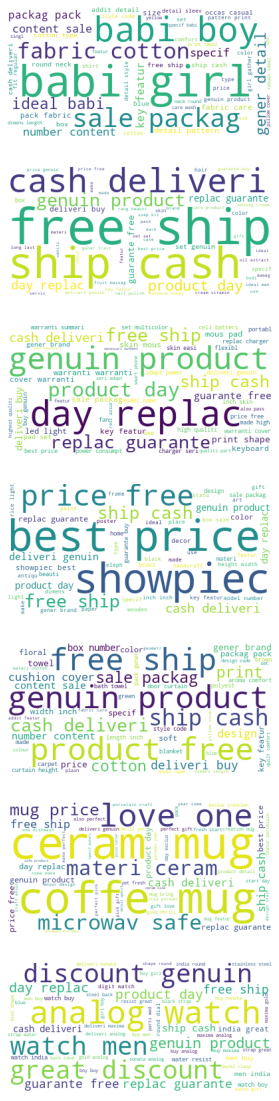

In [110]:
display_wordcloud(corpus_list)

In [111]:
pd.Series(corpus_0).value_counts().head(20)

babi      316
girl      197
cotton    191
detail    180
fabric    164
boy       112
print     105
dress     105
specif    100
ideal      98
gener      96
featur     88
packag     88
sleev      86
type       85
sale       85
color      83
wash       80
neck       80
number     76
dtype: int64

In [112]:
pd.Series(corpus_6).value_counts().head(20)

watch       354
analog      256
men         158
product     136
day         136
deliveri    134
replac      134
cash        134
ship        134
free        134
guarante    134
genuin      134
discount    134
great       134
india       134
buy         134
dial         90
strap        79
boy          67
resist       55
dtype: int64

##### Duplicated words in all of the 7 categories

In [113]:
n = 10
doublons = [i for i in pd.Series(corpus_0).value_counts().head(n).index if i in pd.Series(corpus_1).value_counts().head(n).index]

doublons

[]

In [114]:
n = 20
doublons = [i for i in pd.Series(corpus_0).value_counts().head(n).index if i in pd.Series(corpus_1).value_counts().head(n).index]

doublons

['type', 'color']

In [115]:
n = 30
doublons = [i for i in pd.Series(corpus_0).value_counts().head(n).index if i in pd.Series(corpus_1).value_counts().head(n).index]

doublons

['specif',
 'ideal',
 'gener',
 'featur',
 'type',
 'color',
 'pack',
 'price',
 'box',
 'product',
 'set']

In [116]:
test = generate_duplicated_words_list(corpus_list, n=20)

__Step_1__
__Step_2__
__Step_3__
__Step_4__
__Step_5__
__Step_6__
__Step_7__
__Step_8__
__Step_9__
__Step_10__
__Step_11__
__Step_12__
__Step_13__
__Step_14__
__Step_15__
__Step_16__
__Step_17__
__Step_18__
__Step_19__
__Step_20__
__Step_21__
The length of the list of duplicated words is 130
The length of the set of duplicated words is 26


In [117]:
duplicated_words_set = generate_duplicated_words_list(corpus_list, n=10)

__Step_1__
__Step_2__
__Step_3__
__Step_4__
__Step_5__
__Step_6__
__Step_7__
__Step_8__
__Step_9__
__Step_10__
__Step_11__
__Step_12__
__Step_13__
__Step_14__
__Step_15__
__Step_16__
__Step_17__
__Step_18__
__Step_19__
__Step_20__
__Step_21__
The length of the list of duplicated words is 51
The length of the set of duplicated words is 12


In [118]:
duplicated_words_set

['design',
 'cash',
 'buy',
 'free',
 'day',
 'ship',
 'replac',
 'guarante',
 'product',
 'price',
 'deliveri',
 'cotton']

#### Final cleaning

In [119]:
l = [w for w in list_unique_words if w in eng_words]
print(len(l))

768


In [120]:
len(l)

768

In [121]:
l = [w for w in list_unique_words if w not in eng_words_stem]
print(len(l))

1702


In [122]:
l

['paraben',
 'oodles',
 'ingredients',
 'bullshit',
 'soapking',
 'arabicoudh',
 'students',
 '979',
 'leafs',
 'length225',
 '6645',
 'quantities',
 'sscp',
 '582',
 'appreciation',
 'flawers',
 'playing',
 'balls',
 'ballsech',
 'repeatedly',
 'pmr1918',
 'pmba1872',
 'harmful',
 'objects',
 'counted',
 'merry',
 'pmba1310',
 'cats',
 'leaking',
 'pmr1464',
 'auxiliary',
 'comprehensive',
 '239',
 'bagru',
 '490',
 'trusted',
 'names',
 '710',
 'pots',
 'phonermmw50000160',
 'availed',
 'impeccable',
 '1butter',
 'pmba1044',
 'nt345',
 'dlst2020_red',
 'artrmmw50000330',
 'sonakshi',
 'sinha',
 'pmr1336',
 'pscychological',
 'illusions',
 'hospitality',
 '583',
 'relacement',
 'exciting',
 'vases',
 'nerve',
 'contracture',
 'glycerine',
 'electrodes',
 'offline',
 'breakage',
 'revives',
 '527',
 'machineflipkart',
 'lxbxh',
 'future',
 '18x18x25',
 'hgfvsimstmrn00158',
 'profiles',
 '25cm',
 'mrn',
 'rejuvenative',
 'invigorates',
 'moisturizes',
 'sally',
 'hansen',
 'tubekey',
 '

##### 1) cleaning per document

In [123]:
#data["clean_text"] = data.text.apply(final_clean)
#df = data.copy()
#df["clean_text"] = df.text.parallel_apply(final_clean)

In [124]:
data_text["clean_text"] = data_text.text.apply(lambda x: final_clean(x, process_text_5, "stem", l, eng_words_stem, duplicated_words_set)) # l / list_unique_words

KeyboardInterrupt: 

In [ ]:
data_text.sample(20)

In [ ]:
sub_data = data_text[data_text.target == 0]

for index, series in sub_data.sample(10).iterrows():
    print("__Before__")
    print(series["text"], end="\n\n")
    print("__After__")
    print(series["clean_text"], end="\n\n\n")
    print()

In [ ]:
# check no missing values
data_text.isna().mean()

# save
data_text.to_csv(output_path + "final_data_text.csv", index=False)

##### 2) cleaning corpus (per category) (like above) : to display wordcloud

In [ ]:
for i in range(7):
    globals()["df_clean_" + str(i)] = data_text[data_text.target == i]

In [ ]:
df_clean_0.head()

In [ ]:
for i in range(7):
    globals()["corpus_clean_" + str(i)] = " ".join(globals()["df_clean_" + str(i)].clean_text)

for i in range(7):
    globals()["corpus_clean_" + str(i)] = process_text_5(globals()["corpus_clean_" + str(i)],
                                                   rejoin=False,
                                                         lem_or_stem="stem",
                                                   list_rare_words=list_unique_words,
                                                   eng_words=eng_words_stem,
                                                    extra_words=duplicated_words_set)

In [ ]:
corpus_clean_list = [globals()["corpus_clean_" + str(i)] for i in range(7)]

In [ ]:
corpus_clean_0[:1000]

In [ ]:
display_wordcloud(corpus_clean_list)

#### Cleaning product_name

In [ ]:
raw_corpus = "".join(data_text.product_name.values)
print(raw_corpus[:1_000])
print(len(raw_corpus))

In [ ]:
corpus = process_text_1(raw_corpus)
display_tokens_info(corpus)

In [ ]:
display_wordcloud([corpus])

In [ ]:
for i in range(7):
    globals()["corpus_product_name_" + str(i)] = " ".join(globals()["df_" + str(i)].product_name)


In [ ]:
corpus_product_name_0[:1000]

In [ ]:
len(corpus_product_name_0)

In [ ]:
for i in range(7):
    print("\n\n__Before__Category__{}".format(str(i)))
    display_tokens_info(globals()["corpus_product_name_" + str(i)])


In [ ]:
for i in range(7):
    globals()["corpus_product_name_" + str(i)] = process_text_4(globals()["corpus_product_name_" + str(i)],
                                                                rejoin=False,
                                                                list_rare_words=[],
                                                                eng_words=eng_words_stem)

In [ ]:
for i in range(7):
    print("\n\n__After__Category__{}".format(str(i)))
    display_tokens_info(globals()["corpus_product_name_" + str(i)])


In [ ]:
corpus_list_product_name = [globals()["corpus_product_name_" + str(i)] for i in range(7)]


In [ ]:
display_wordcloud(corpus_list_product_name)

In [ ]:
duplicated_words_set = generate_duplicated_words_list(corpus_list_product_name, n=15)
print(duplicated_words_set)

In [ ]:
# idem for 2 times

tmp = pd.Series(corpus).value_counts()
list_max_1_words_product_name = tmp[tmp <= 1]
print(list_max_1_words_product_name[:30])

# save it

list_max_1_words_product_name = list(list_max_1_words_product_name.index)
tmp = pd.DataFrame({"words": list_max_1_words_product_name})
tmp.to_csv(output_path + "product_name_max_1_words.csv", index=False)

In [ ]:
list_max_1_words_product_name

In [ ]:
data_text["clean_product_name"] = data_text.product_name.apply(lambda x: final_clean(x, process_text_5, "stem", list_max_1_words_product_name, eng_words_stem, [])) # list_max_1_words_product_name duplicated_words_set

In [ ]:
data_text.sample(20)

In [ ]:
sub_data = data_text[data_text.target == 0]

for index, series in sub_data.sample(10).iterrows():
    print("__Before__")
    print(series["product_name"], end="\n\n")
    print("__After__")
    print(series["clean_product_name"], end="\n\n\n")
    print()

print("Counting number of characters in each row / product")
data_text["_len_clean_text_"] = data_text.clean_text.str.len()
data_text["_len_clean_product_name_"] = data_text.clean_product_name.str.len()


In [ ]:
print("Counting number of words in each row / product")
data_text["_len_clean_text_"] = data_text.clean_text.str.split().apply(len)
data_text["_len_clean_product_name_"] = data_text.clean_product_name.str.split().apply(len)


In [ ]:
data_text

In [ ]:
#data_text["_len_clean_text_"].value_counts(normalize=True).plot(kind="pie")

In [ ]:
#data_text["_len_clean_text_"].sort_values()
data_text[data_text["_len_clean_text_"] == 0]

In [ ]:
sns.boxplot(data_text["_len_clean_text_"])

In [ ]:
data_text[data_text["_len_clean_product_name_"] == 0]

In [ ]:
sns.boxplot(data_text["_len_clean_product_name_"])

In [ ]:
data_text[(data_text["_len_clean_product_name_"] == 0) & (data_text["_len_clean_text_"] == 0)]

In [ ]:
# save
data_text.to_csv(output_path + "final_data_text.csv", index=False)

In [ ]:
def clean_text(df):
    pass #TODOOOO

### II) Transformations

In [ ]:
from common_graphs import *

In [ ]:
data = pd.read_csv(output_path + "final_data_text.csv")

In [ ]:
data

#### 1) Bag of Words : Count words + TF-IDF

In [ ]:
from bag_of_words import *

In [ ]:
# 1) texte / 2) images (paralleles can do)
# 1 vocab pour chaque doc

# texte :
# nettoyage du texte / normalisation (pré ttt cf notebook)
# bag of words
# reduction dimension tSNE ici
# 7 clusters
# ARI score : sur la valeur à obtenir 0.4/0.5 (0.6 ou 0.7)
# objectifs : cours OC x2 + webinair / Youtube
# vendredi

In [ ]:
import logging

logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere

In [ ]:
l_cat = list(set(data['category']))
l_cat

print("catégories : ", l_cat)
y_cat_num = data["target"]### ?? ## [(1-l_cat.index(data.iloc[i]['category'])) for i in range(len(data))]
y_cat_num

In [ ]:
data

#### 1) fit / transform description - text

##### 1) Préparation sentences

In [ ]:
feat = ['text'] # 'text' 0.399 et 0.5567

cv_transform, ctf_transform = create_bag_of_words_vectors(data, feat, feat)

In [ ]:
print(ctf_transform.shape)

##### 2) Exécution des modèles

In [ ]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform, l_cat, y_cat_num)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform, l_cat, y_cat_num)


##### 3) Graphiques

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

#### 2) fit / transform product_name + text

##### 1) Préparation sentences

In [ ]:
# création du bag of words (CountVectorizer et Tf-idf)
print("Separate vocabulary")

textual_columns = ['product_name', 'text']

cv_transform, ctf_transform = create_bag_of_words_vectors(data_text, textual_columns, textual_columns)


In [ ]:
cv_transform.shape

In [ ]:
ctf_transform.shape

##### 2) Exécution des modèles

In [ ]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform, l_cat, y_cat_num)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform, l_cat, y_cat_num)


##### 3) Graphiques

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

#### 3) fit product_name / transform text

##### 1) Préparation sentences

In [ ]:
# création du bag of words (CountVectorizer et Tf-idf)

feat_fit = ['product_name']
feat_transform = ['text']

cv_transform, ctf_transform = create_bag_of_words_vectors(data, feat_fit, feat_transform)

##### 2) Exécution des modèles

In [ ]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform, l_cat, y_cat_num)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform, l_cat, y_cat_num)


##### 3) Graphiques

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

### II) Words Embeddings : Word2Vec

In [ ]:
from Word2Vec import *

##### 1) Création du modèle Word2Vec

In [ ]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = data['clean_text'].to_list() # text : 0.19 ARI
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [ ]:
w2v_words, model_vectors = create_w2v_model(sentences, w2v_min_count, w2v_size, w2v_window, w2v_epochs)

In [ ]:
# Préparation des sentences (tokenization)
x_sentences, tokenizer = tokenize_sentences(sentences, maxlen)

##### 3) Création de la matrice d'embedding

In [ ]:
# Création de la matrice d'embedding

embedding_matrix, vocab_size = create_embedding_matrix(w2v_words, model_vectors, tokenizer)

##### 4) Création du modèle d'embedding

In [ ]:
# Création du modèle

embed_model = create_embedding_model(x_sentences, maxlen, vocab_size, w2v_size, embedding_matrix)

##### 5) Exécution du modèle

In [ ]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

In [ ]:
ARI, X_tsne, labels = ARI_fct(embeddings, l_cat, y_cat_num)

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

### III) Words Embeddings : BERT

In [ ]:
from BERT import *
from transformers import TFAutoModel

import tensorflow_hub as hub

https://www.tensorflow.org/text/guide/word_embeddings

In [ ]:
os.environ["TF_KERAS"]='1'

In [ ]:
print(tf.__version__)
#print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

#### 1) BERT HuggingFace

##### 1.1) 'bert-base-uncased'

In [ ]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = data['product_name'].to_list() # clean_text 0.29

In [ ]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences,
                                                         max_length, batch_size, mode='HF')

In [ ]:
ARI, X_tsne, labels = ARI_fct(features_bert, l_cat, y_cat_num)

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

##### 1.2) 'cardiffnlp/twitter-roberta-base-sentiment'
* Modèle pré-entraîné sur des tweets pour l'analyse de sentiment = particulièrement adapté au contexte

In [ ]:
max_length = 64
batch_size = 10
model_type = 'cardiffnlp/twitter-roberta-base-sentiment'
model = TFAutoModel.from_pretrained(model_type)
sentences = data['text'].to_list()

In [ ]:
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences,
                                                         max_length, batch_size, mode='HF')

In [ ]:
ARI, X_tsne, labels = ARI_fct(features_bert, l_cat, y_cat_num)

#### 2) BERT hub Tensorflow

import tensorflow_text

In [ ]:
# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [ ]:
sentences = data['text'].to_list()

In [ ]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences,
                                                         max_length, batch_size, mode='TFhub')

In [ ]:
ARI, X_tsne, labels = ARI_fct(features_bert, l_cat, y_cat_num)

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

### IV) Words Embeddings : USE (Universal Sentence Encoder)

In [ ]:
from USE import *

https://tfhub.dev/google/universal-sentence-encoder/4

In [ ]:
os.environ["TF_KERAS"]='1'

In [ ]:
print(tf.__version__)
#print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

In [ ]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

##### Using product_name

In [ ]:
batch_size = 10
sentences = data['product_name'].to_list() # no preprocessing better !! ? to check

In [ ]:
features_USE = feature_USE_fct(embed, sentences, batch_size)

In [ ]:
ARI, X_tsne, labels = ARI_fct(features_USE, l_cat, y_cat_num)

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

##### Using text / clean_text : cleaned or not

In [ ]:
batch_size = 10
sentences = data['text'].to_list() # no preprocessing better !! ? to check

In [ ]:
features_USE = feature_USE_fct(sentences, batch_size)

In [ ]:
ARI, X_tsne, labels = ARI_fct(features_USE, l_cat, y_cat_num)

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

In [ ]:
# End of notebook time
t1 = time()
print("computing time : {:8.6f} sec".format(t1 - t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1 - t0)))